In [1]:
# Set up Dependencies
from progress.bar import IncrementalBar
import matplotlib.pyplot as plt
import statistics as st
import pandas as pd
import numpy as np
import requests
import time
import nltk
import json
import csv
import sys
import os
import re
from scipy.stats import linregress
from pprint import pprint

In [2]:
# read the data back into the dataframe from the csv file
input_data_file = os.path.join('data_files','good_merged_data.csv')

# write the DataFrame data to the csv file
movie_df = pd.read_csv(input_data_file)

movie_df.head()

,Title,Year,Rated,Released,Runtime,Genre,Language,Awards,imdbRating,imdbVotes,imdbID,Type,Production,Budget,Revenue,ROI%
0,Vulgar,2000,R,26 Apr 2002,87,"Crime, Drama, Thriller",English,NaN,5.3,3876,tt0120467,movie,Lions Gate Films,120000,14904,-87.58
1,Out of the Furnace,2013,R,06 Dec 2013,116,"Action, Crime, Drama, Thriller",English,2 wins & 9 nominations.,6.8,103339,tt1206543,movie,Relativity Media,22000000,15400000,-30.00
2,Coyote Ugly,2000,PG-13,04 Aug 2000,100,"Comedy, Drama, Music, Romance",English,4 wins & 8 nominations.,5.7,104644,tt0200550,movie,Buena Vista,45000000,113916474,153.15
3,Parental Guidance,2012,PG,25 Dec 2012,105,"Comedy, Family",English,1 win & 4 nominations.,6.0,24453,tt1047540,movie,20th Century Fox,25000000,119772232,379.09
4,Raising Helen,2004,PG-13,28 May 2004,119,"Comedy, Drama, Romance",English,1 nomination.,6.0,34868,tt0350028,movie,Buena Vista Pictures,50000000,49718611,-0.56


In [3]:
dictOfAwards = {'Oscar Win':[],'Oscar Nomination':[],'Golden Globe Win':[],'Golden Globe Nomination':[],
                'BAFTA Win':[],'BAFTA Nomination':[],'Win':[],'Nomination':[]}
dictOfAwards

{'Oscar Win': [],
 'Oscar Nomination': [],
 'Golden Globe Win': [],
 'Golden Globe Nomination': [],
 'BAFTA Win': [],
 'BAFTA Nomination': [],
 'Win': [],
 'Nomination': []}

In [4]:
oscarwin = False
oscarnom = False
ggwin = False
ggnom = False
baftawin = False
baftanom = False
win = False
nom = False

for item in movie_df['Awards'].to_list():
#     print(item)
    if pd.notnull(item):
        item = item.replace('. ', ',')
        item = item.replace('.','')
        item = item.replace(' & ',',')
        strings = item.split(',')
        print(strings)
        for award in strings:
            if 'Oscar' in award:
                if 'Won' in award:
                    award = award.replace('Won ','')
                    award = award.replace(' Oscars','')
                    award = award.replace(' Oscar','')
                    print(f'     Oscars won: {award}')
                    dictOfAwards['Oscar Win'].append(award)
                    oscarwin = True
                elif 'Nominated' in award:
                    award = award.replace('Nominated for ','')
                    award = award.replace(' Oscars','')
                    award = award.replace(' Oscar','')
                    print(f'     Oscar nominations: {award}')
                    dictOfAwards['Oscar Nomination'].append(award)
                    oscarnom = True
                else:
                    print('     something went wrong with Oscar')
            elif 'Golden Globe' in award:
                if 'Won' in award:
                    award = award.replace('Won ','')
                    award = award.replace(' Golden Globes','')
                    award = award.replace(' Golden Globe','')
                    print(f'     Golden Globes won: {award}')
                    dictOfAwards['Golden Globe Win'].append(award)
                    ggwin = True
                elif 'Nominated' in award:
                    award = award.replace('Nominated for ','')
                    award = award.replace(' Golden Globes','')
                    award = award.replace(' Golden Globe','')
                    print(f'     Golden Globe nominations: {award}')
                    dictOfAwards['Golden Globe Nomination'].append(award)
                    ggnom = True
                else:
                    print('     something went wrong with Golden Globe')
            elif 'BAFTA' in award:
                if 'Won' in award:
                    award = award.replace('Won ','')
                    award = award.replace(' BAFTA Film Awards','')
                    award = award.replace(' BAFTA Film Award','')
                    print(f'     BAFTAs won: {award}')
                    dictOfAwards['BAFTA Win'].append(award)
                    baftawin = True
                elif 'Nominated' in award:
                    award = award.replace('Nominated for ','')
                    award = award.replace(' BAFTA Film Awards','')
                    award = award.replace(' BAFTA Film Award','')
                    print(f'     BAFTA nominations: {award}')
                    dictOfAwards['BAFTA Nomination'].append(award)
                    baftanom = True
                else:
                    print('     something went wrong with BAFTA')
            elif 'win' in award:
                award = award.replace('Another ','')
                award = award.replace(' wins','')
                award = award.replace(' win','')
                print(f'          Wins: {award}')
                dictOfAwards['Win'].append(award)
                win = True
            elif 'nomination' in award:
                award = award.replace('Another ','')
                award = award.replace(' nominations','')
                award = award.replace(' nomination','')
                print(f'          Nominations: {award}')
                dictOfAwards['Nomination'].append(award)
                nom = True
            else:
                print('********************************YOU MISSED SOMETHING************************')

        if oscarwin:
            oscarwin = False
        else:
            dictOfAwards['Oscar Win'].append(0)
        if oscarnom:
            oscarnom = False
        else:
            dictOfAwards['Oscar Nomination'].append(0)
            
        if ggwin:
            ggwin = False
        else:
            dictOfAwards['Golden Globe Win'].append(0)
        if ggnom:
            ggnom = False
        else:
            dictOfAwards['Golden Globe Nomination'].append(0)
            
        if baftawin:
            baftawin = False
        else:
            dictOfAwards['BAFTA Win'].append(0)
        if baftanom:
            baftanom = False
        else:
            dictOfAwards['BAFTA Nomination'].append(0)
            
        if win:
            win = False
        else:
            dictOfAwards['Win'].append(0)
        if nom:
            nom = False
        else:
            dictOfAwards['Nomination'].append(0)
    else:
        dictOfAwards['Oscar Win'].append(0)
        dictOfAwards['Oscar Nomination'].append(0)
        dictOfAwards['Golden Globe Win'].append(0)
        dictOfAwards['Golden Globe Nomination'].append(0)
        dictOfAwards['BAFTA Win'].append(0)
        dictOfAwards['BAFTA Nomination'].append(0)
        dictOfAwards['Win'].append(0)
        dictOfAwards['Nomination'].append(0)
                


['2 wins', '9 nominations']
          Wins: 2
          Nominations: 9
['4 wins', '8 nominations']
          Wins: 4
          Nominations: 8
['1 win', '4 nominations']
          Wins: 1
          Nominations: 4
['1 nomination']
          Nominations: 1
['2 nominations']
          Nominations: 2
['4 nominations']
          Nominations: 4
['1 nomination']
          Nominations: 1
['2 wins', '5 nominations']
          Wins: 2
          Nominations: 5
['Nominated for 2 Golden Globes', 'Another 4 wins', '5 nominations']
     Golden Globe nominations: 2
          Wins: 4
          Nominations: 5
['3 wins', '12 nominations']
          Wins: 3
          Nominations: 12
['Won 1 Oscar', 'Another 24 wins', '93 nominations']
     Oscars won: 1
          Wins: 24
          Nominations: 93
['Nominated for 1 Oscar', 'Another 1 win', '4 nominations']
     Oscar nominations: 1
          Wins: 1
          Nominations: 4
['2 wins', '3 nominations']
          Wins: 2
          Nominations: 3
['7 wins', '

In [5]:
for key in dictOfAwards:
    print(len(dictOfAwards[key]))

586
586
586
586
586
586
586
586


In [6]:
awards_df = movie_df.copy()

In [7]:
awards_df

,Title,Year,Rated,Released,Runtime,Genre,Language,Awards,imdbRating,imdbVotes,imdbID,Type,Production,Budget,Revenue,ROI%
0,Vulgar,2000,R,26 Apr 2002,87,"Crime, Drama, Thriller",English,NaN,5.3,3876,tt0120467,movie,Lions Gate Films,120000,14904,-87.58
1,Out of the Furnace,2013,R,06 Dec 2013,116,"Action, Crime, Drama, Thriller",English,2 wins & 9 nominations.,6.8,103339,tt1206543,movie,Relativity Media,22000000,15400000,-30.00
2,Coyote Ugly,2000,PG-13,04 Aug 2000,100,"Comedy, Drama, Music, Romance",English,4 wins & 8 nominations.,5.7,104644,tt0200550,movie,Buena Vista,45000000,113916474,153.15
3,Parental Guidance,2012,PG,25 Dec 2012,105,"Comedy, Family",English,1 win & 4 nominations.,6.0,24453,tt1047540,movie,20th Century Fox,25000000,119772232,379.09
4,Raising Helen,2004,PG-13,28 May 2004,119,"Comedy, Drama, Romance",English,1 nomination.,6.0,34868,tt0350028,movie,Buena Vista Pictures,50000000,49718611,-0.56
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581,Life,2017,R,24 Mar 2017,104,"Horror, Sci-Fi, Thriller","English, Japanese, Vietnamese",7 nominations.,6.6,199775,tt5442430,movie,Skydance Films,58000000,100541806,73.35
582,Filth,2013,R,24 Apr 2014,97,"Comedy, Crime, Drama","English, German, Scots",9 wins & 14 nominations.,7.1,98589,tt1450321,movie,Magnet Releasing,5000000,9114264,82.29
583,Masterminds,2016,PG-13,30 Sep 2016,95,"Biography, Comedy, Crime","English, Spanish",1 nomination.,5.8,48784,tt2461150,movie,Relativity Media,25000000,29200000,16.80
584,Planet 51,2009,PG,20 Nov 2009,91,"Animation, Adventure, Comedy, Family, Sci-Fi","English, Spanish",4 wins & 4 nominations.,6.0,49599,tt0762125,movie,Sony Pictures/TriStar Pictures,70000000,104945765,49.92


In [8]:
for key in dictOfAwards:
    awards_df[key] = dictOfAwards[key]
awards_df

,Title,Year,Rated,Released,Runtime,Genre,Language,Awards,imdbRating,imdbVotes,...,Revenue,ROI%,Oscar Win,Oscar Nomination,Golden Globe Win,Golden Globe Nomination,BAFTA Win,BAFTA Nomination,Win,Nomination
0,Vulgar,2000,R,26 Apr 2002,87,"Crime, Drama, Thriller",English,NaN,5.3,3876,...,14904,-87.58,0,0,0,0,0,0,0,0
1,Out of the Furnace,2013,R,06 Dec 2013,116,"Action, Crime, Drama, Thriller",English,2 wins & 9 nominations.,6.8,103339,...,15400000,-30.00,0,0,0,0,0,0,2,9
2,Coyote Ugly,2000,PG-13,04 Aug 2000,100,"Comedy, Drama, Music, Romance",English,4 wins & 8 nominations.,5.7,104644,...,113916474,153.15,0,0,0,0,0,0,4,8
3,Parental Guidance,2012,PG,25 Dec 2012,105,"Comedy, Family",English,1 win & 4 nominations.,6.0,24453,...,119772232,379.09,0,0,0,0,0,0,1,4
4,Raising Helen,2004,PG-13,28 May 2004,119,"Comedy, Drama, Romance",English,1 nomination.,6.0,34868,...,49718611,-0.56,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581,Life,2017,R,24 Mar 2017,104,"Horror, Sci-Fi, Thriller","English, Japanese, Vietnamese",7 nominations.,6.6,199775,...,100541806,73.35,0,0,0,0,0,0,0,7
582,Filth,2013,R,24 Apr 2014,97,"Comedy, Crime, Drama","English, German, Scots",9 wins & 14 nominations.,7.1,98589,...,9114264,82.29,0,0,0,0,0,0,9,14
583,Masterminds,2016,PG-13,30 Sep 2016,95,"Biography, Comedy, Crime","English, Spanish",1 nomination.,5.8,48784,...,29200000,16.80,0,0,0,0,0,0,0,1
584,Planet 51,2009,PG,20 Nov 2009,91,"Animation, Adventure, Comedy, Family, Sci-Fi","English, Spanish",4 wins & 4 nominations.,6.0,49599,...,104945765,49.92,0,0,0,0,0,0,4,4


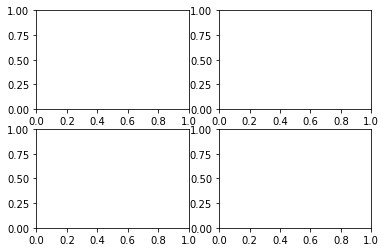

In [9]:
fig,axes=plt.subplots(2,2)

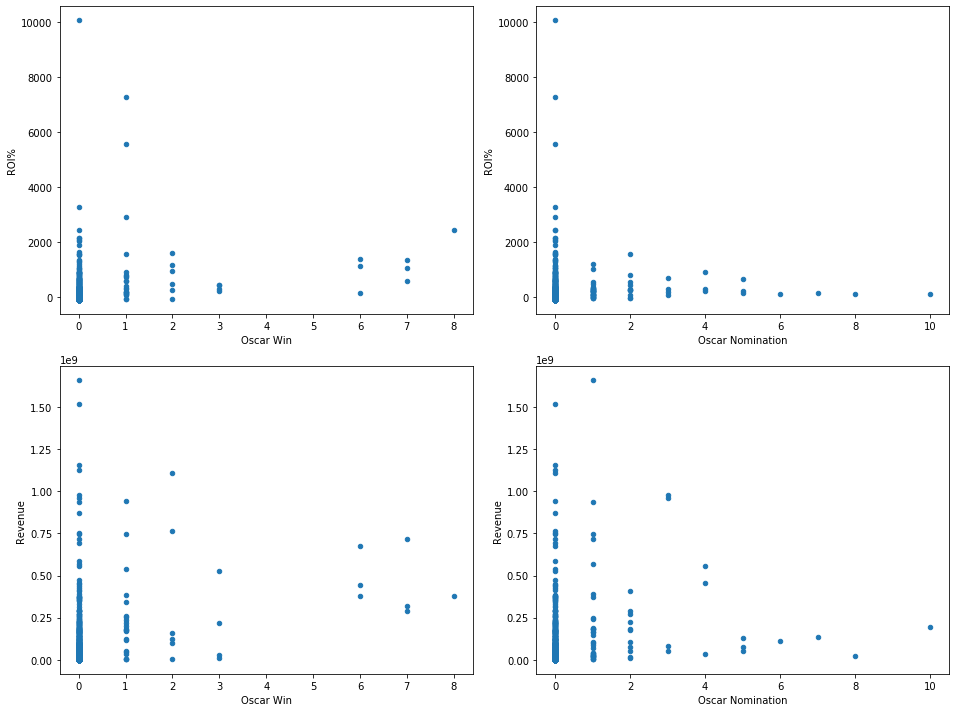

In [10]:
fig = plt.figure(figsize=[20, 10])
gs = plt.GridSpec(2, 3, figure=fig)

axes[0,0] = fig.add_subplot(gs[0, 0])
axes[1,0] = fig.add_subplot(gs[1, 0])
axes[0,1] = fig.add_subplot(gs[0, 1])
axes[1,1] = fig.add_subplot(gs[1, 1])

awards_df.plot(x='Oscar Win',y='ROI%',kind='scatter',ax=axes[0,0],subplots=True)
awards_df.plot(x='Oscar Win',y='Revenue',kind='scatter',ax=axes[1,0],subplots=True)
awards_df.plot(x='Oscar Nomination',y='ROI%',kind='scatter',ax=axes[0,1],subplots=True)
awards_df.plot(x='Oscar Nomination',y='Revenue',kind='scatter',ax=axes[1,1],subplots=True)
plt.tight_layout()
plt.show()

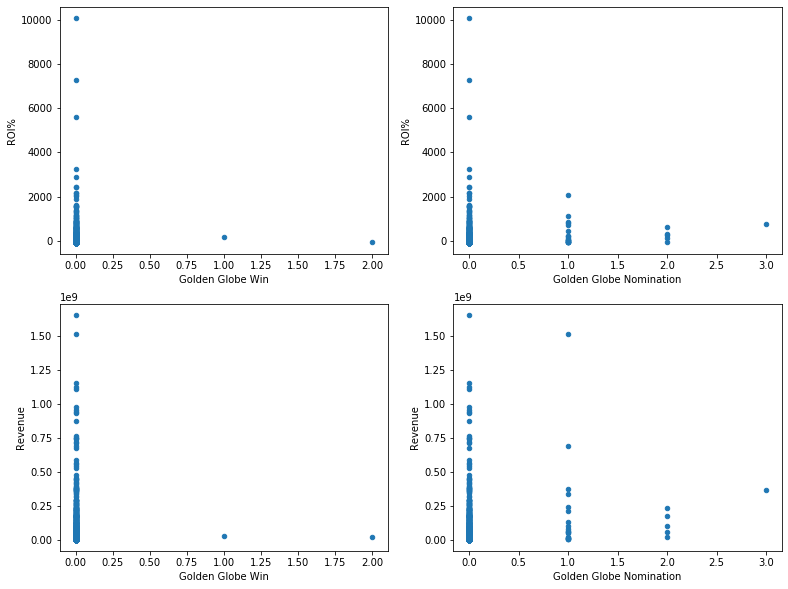

In [11]:
fig = plt.figure(figsize=[20, 10])
gs = plt.GridSpec(2, 3, figure=fig)

axes[0,0] = fig.add_subplot(gs[0, 0])
axes[1,0] = fig.add_subplot(gs[1, 0])
axes[0,1] = fig.add_subplot(gs[0, 1])
axes[1,1] = fig.add_subplot(gs[1, 1])

awards_df.plot(x='Golden Globe Win',y='ROI%',kind='scatter',ax=axes[0,0],subplots=True)
awards_df.plot(x='Golden Globe Win',y='Revenue',kind='scatter',ax=axes[1,0],subplots=True)
awards_df.plot(x='Golden Globe Nomination',y='ROI%',kind='scatter',ax=axes[0,1],subplots=True)
awards_df.plot(x='Golden Globe Nomination',y='Revenue',kind='scatter',ax=axes[1,1],subplots=True)

plt.show()

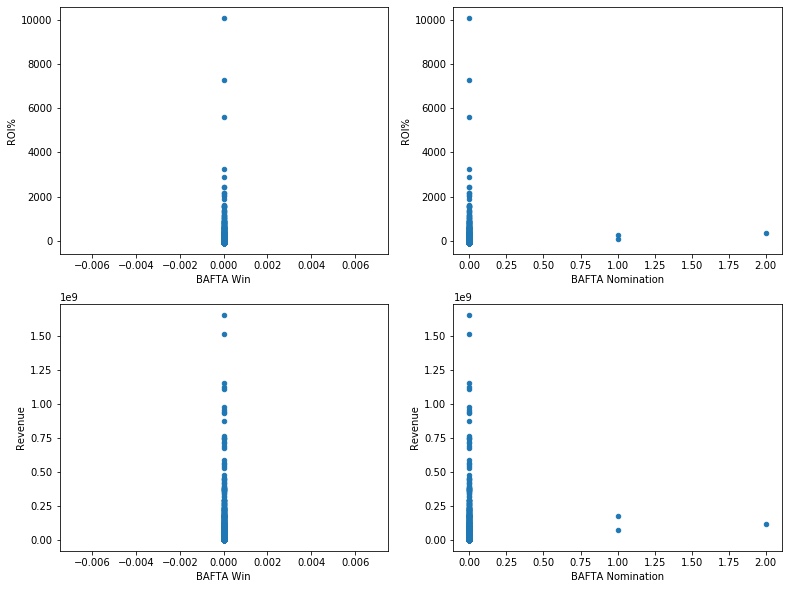

In [12]:
fig = plt.figure(figsize=[20, 10])
gs = plt.GridSpec(2, 3, figure=fig)

axes[0,0] = fig.add_subplot(gs[0, 0])
axes[1,0] = fig.add_subplot(gs[1, 0])
axes[0,1] = fig.add_subplot(gs[0, 1])
axes[1,1] = fig.add_subplot(gs[1, 1])

awards_df.plot(x='BAFTA Win',y='ROI%',kind='scatter',ax=axes[0,0],subplots=True)
awards_df.plot(x='BAFTA Win',y='Revenue',kind='scatter',ax=axes[1,0],subplots=True)
awards_df.plot(x='BAFTA Nomination',y='ROI%',kind='scatter',ax=axes[0,1],subplots=True)
awards_df.plot(x='BAFTA Nomination',y='Revenue',kind='scatter',ax=axes[1,1],subplots=True)

plt.show()

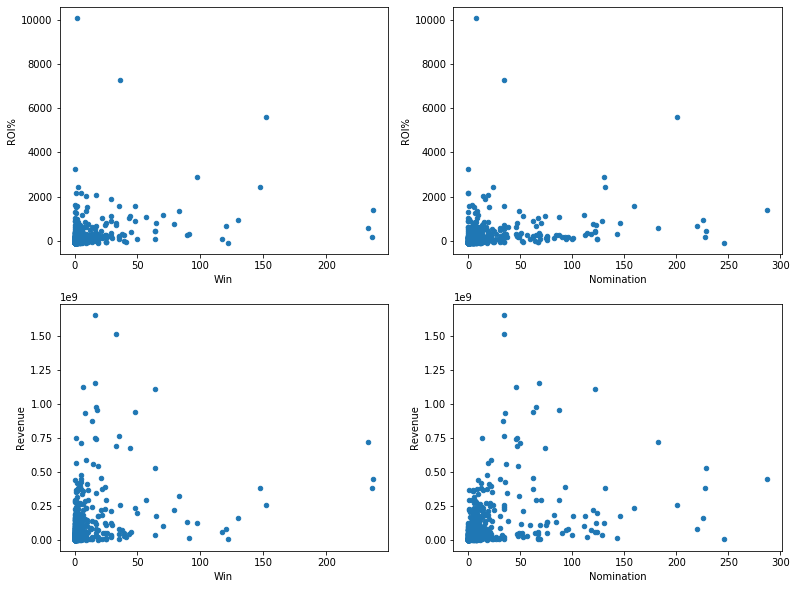

In [13]:
fig = plt.figure(figsize=[20, 10])
gs = plt.GridSpec(2, 3, figure=fig)

axes[0,0] = fig.add_subplot(gs[0, 0])
axes[1,0] = fig.add_subplot(gs[1, 0])
axes[0,1] = fig.add_subplot(gs[0, 1])
axes[1,1] = fig.add_subplot(gs[1, 1])

awards_df.plot(x='Win',y='ROI%',kind='scatter',ax=axes[0,0],subplots=True)
awards_df.plot(x='Win',y='Revenue',kind='scatter',ax=axes[1,0],subplots=True)
awards_df.plot(x='Nomination',y='ROI%',kind='scatter',ax=axes[0,1],subplots=True)
awards_df.plot(x='Nomination',y='Revenue',kind='scatter',ax=axes[1,1],subplots=True)

plt.show()